In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
file_path = r'C:\Users\Etayswen\Downloads\archive (3)\games.csv'
data = pd.read_csv(file_path)

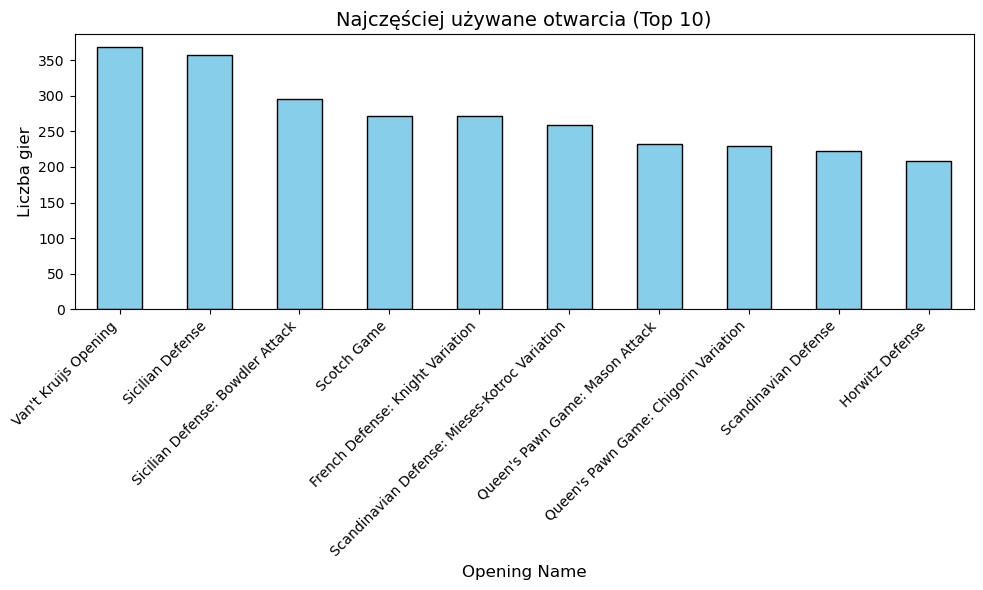

In [4]:
# 1. Najczęściej używane otwarcia
top_openings = data['opening_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_openings.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Najczęściej używane otwarcia (Top 10)', fontsize=14)
plt.xlabel('Opening Name', fontsize=12)
plt.ylabel('Liczba gier', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

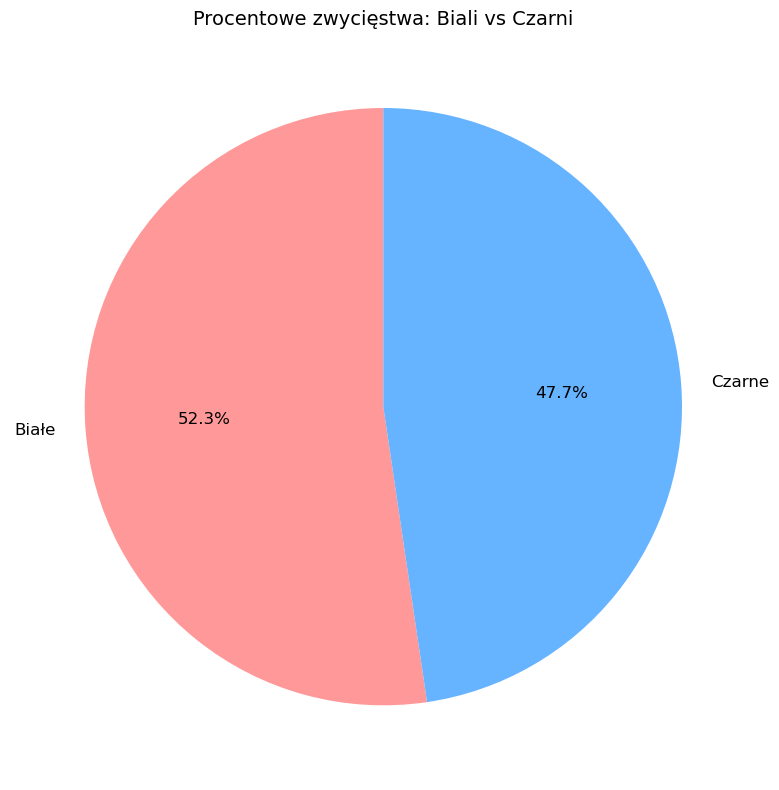

In [5]:
# 2. Procentowe zwycięstwa białych i czarnych
winner_counts = data['winner'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
winner_counts[['white', 'black']].plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], 
                                       startangle=90, textprops={'fontsize': 12}, labels=['Białe', 'Czarne'])
plt.title('Procentowe zwycięstwa: Biali vs Czarni', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

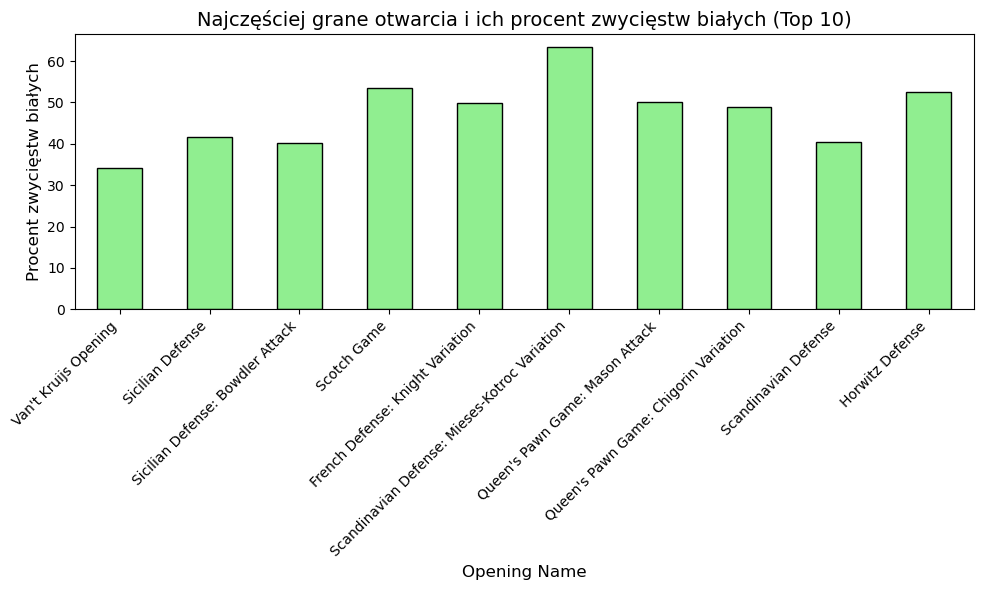

In [10]:
# 3. Najczęściej grane otwarcia i ich procent zwycięstw
opening_counts = data['opening_name'].value_counts().head(10)
opening_winrates = data.groupby('opening_name')['winner'].value_counts(normalize=True).unstack().fillna(0)
opening_white_winrate = opening_winrates['white'] * 100

top_openings_with_winrate = opening_white_winrate.loc[opening_counts.index]

plt.figure(figsize=(10, 6))
top_openings_with_winrate.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Najczęściej grane otwarcia i ich procent zwycięstw białych (Top 10)', fontsize=14)
plt.xlabel('Opening Name', fontsize=12)
plt.ylabel('Procent zwycięstw białych', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

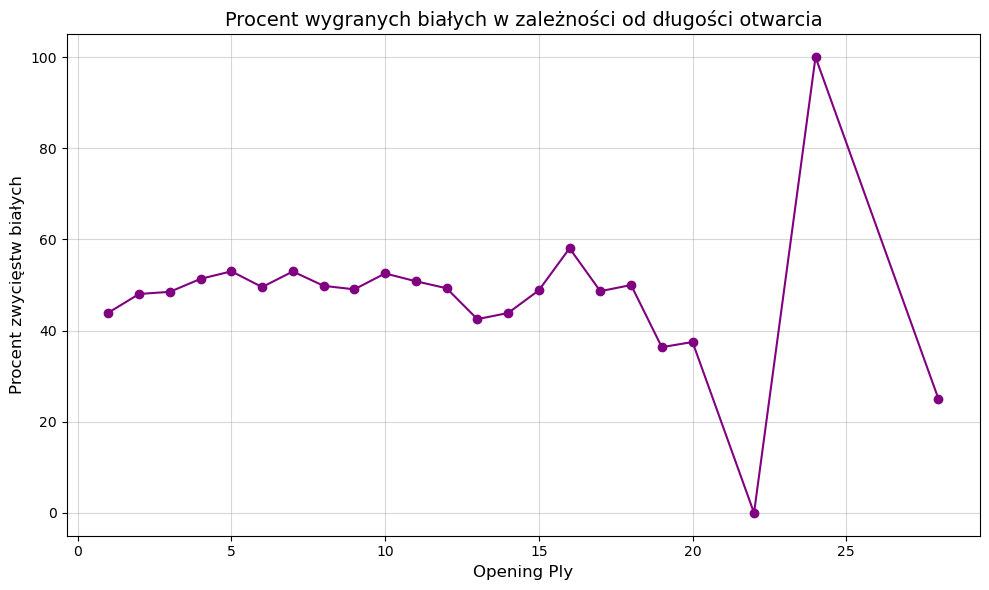

In [7]:
# 4. Procent wygranych w zależności od długości otwarcia
ply_wins = data.groupby('opening_ply')['winner'].value_counts(normalize=True).unstack().fillna(0)
ply_white_winrate = ply_wins['white'] * 100
plt.figure(figsize=(10, 6))
ply_white_winrate.plot(color='purple', marker='o')
plt.title('Procent wygranych białych w zależności od długości otwarcia', fontsize=14)
plt.xlabel('Opening Ply', fontsize=12)
plt.ylabel('Procent zwycięstw białych', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

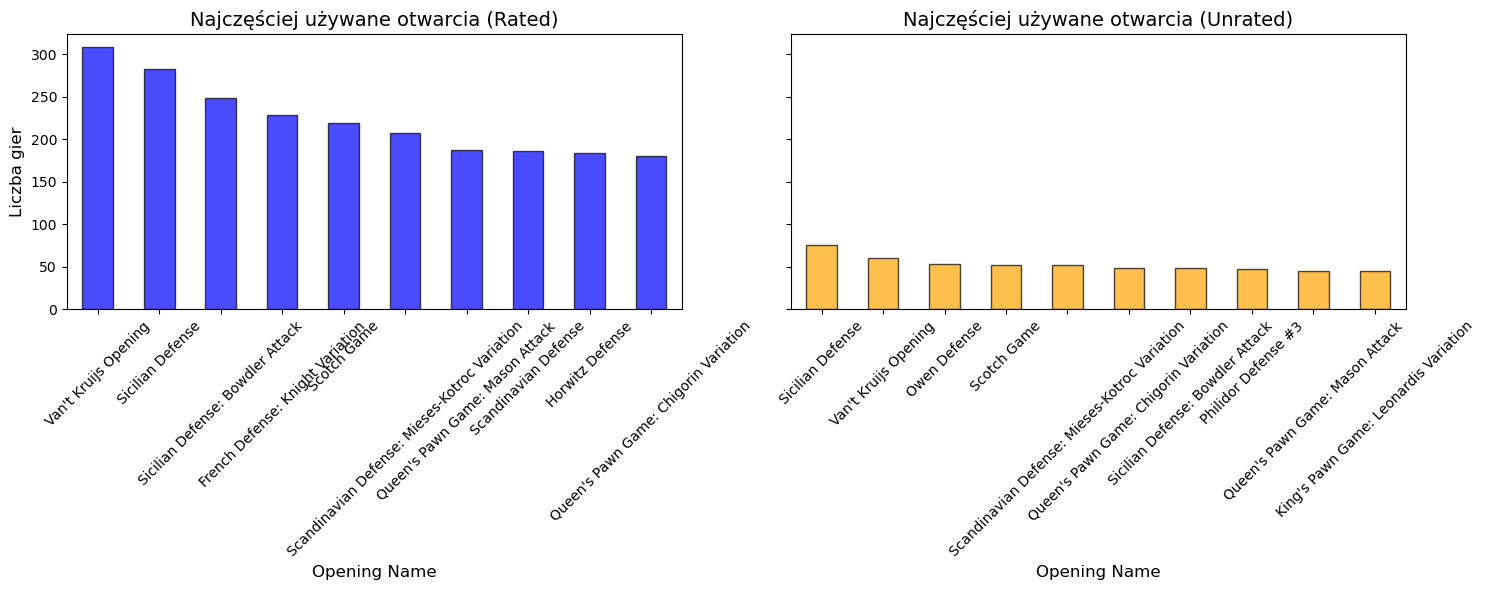

In [8]:
# 5. Najczęściej używane otwarcia w zależności od klasyfikacji rankingowej (Rated)
rated_openings = data[data['rated'] == True]['opening_name'].value_counts().head(10)
unrated_openings = data[data['rated'] == False]['opening_name'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
rated_openings.plot(kind='bar', ax=axes[0], color='blue', edgecolor='black', alpha=0.7)
axes[0].set_title('Najczęściej używane otwarcia (Rated)', fontsize=14)
axes[0].set_xlabel('Opening Name', fontsize=12)
axes[0].set_ylabel('Liczba gier', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

unrated_openings.plot(kind='bar', ax=axes[1], color='orange', edgecolor='black', alpha=0.7)
axes[1].set_title('Najczęściej używane otwarcia (Unrated)', fontsize=14)
axes[1].set_xlabel('Opening Name', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()